In [6]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('C://Users//Nitin//Downloads//blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
# Step 2: Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [7]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Initialize stopwords set
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
# Preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    tokens
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [14]:
# Apply preprocessing to the 'Data' column
df['Processed_Data'] = df['Data'].apply(preprocess_text)
df['Processed_Data']


0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Processed_Data, Length: 2000, dtype: object

In [15]:
# Display the first few rows of the processed data
print(df[['Data', 'Processed_Data', 'Labels']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Data       Labels  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism  


In [17]:
# Step 3: Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Data'])
X_tfidf

<2000x56432 sparse matrix of type '<class 'numpy.float64'>'
	with 268023 stored elements in Compressed Sparse Row format>

In [18]:
# Display the shape of the TF-IDF feature matrix
print(X_tfidf.shape)

(2000, 56432)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Labels'], test_size=0.2, random_state=42)


In [21]:
# Implement a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [23]:
# Predict the categories for the test set
y_pred = nb_classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'talk.politics.misc', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian',

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94  

In [26]:
# Sentiment Analysis
# Initialize the VADER sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [27]:
# Function to analyze sentiment
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [29]:
# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(analyze_sentiment)
df['Sentiment']

0       negative
1       positive
2       negative
3       negative
4       positive
          ...   
1995    positive
1996    positive
1997    positive
1998    positive
1999    negative
Name: Sentiment, Length: 2000, dtype: object

In [31]:
# Display the first few rows with sentiment
print(df[['Data', 'Sentiment', 'Labels']].head())

                                                Data Sentiment       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive  alt.atheism


In [34]:
# Examine the distribution of sentiments across different categories
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

<Figure size 1500x600 with 0 Axes>

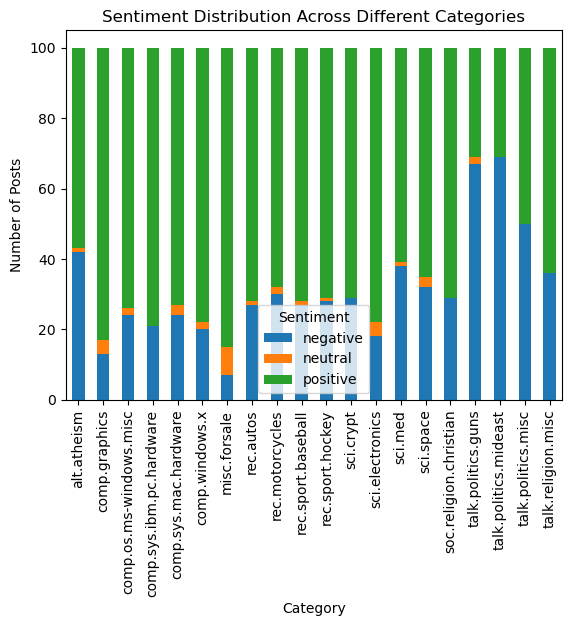

Sentiment   negative    neutral   positive
count      20.000000  20.000000  20.000000
mean       31.550000   1.750000  66.700000
std        15.776315   1.970172  14.829203
min         7.000000   0.000000  31.000000
25%        23.250000   0.000000  63.250000
50%        28.500000   1.000000  71.000000
75%        36.500000   2.250000  75.000000
max        69.000000   8.000000  85.000000


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution
plt.figure(figsize=(15,6))
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

# Summarize findings
summary = sentiment_distribution.describe()
print(summary)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94  

In [47]:
#Performance Discussion and Challenges:
#Performance Metrics:
#The accuracy, precision, recall, and F1-score metrics provide a quantitative measure of the model's performance. High values for these metrics indicate good performance, whereas lower values suggest room for improvement.

#Challenges Encountered:
#Imbalanced Data: If certain categories are underrepresented, the model might be biased towards the majority class, affecting precision and recall for minority classes.
#Text Preprocessing: Proper text preprocessing is crucial. Issues such as incorrect tokenization or incomplete stopword removal can impact feature extraction and, consequently, model performance.
#Feature Extraction: Selecting the right features (using TF-IDF in this case) is important for capturing relevant information from the text. Insufficient or irrelevant features can degrade model performance.

# Sentiment Analysis Results Reflection:

In [ ]:
#The sentiment analysis results provide additional insights into the emotional tone of the blog posts. Understanding the distribution of sentiments across categories can help in tailoring content strategies, identifying areas for improvement, and better understanding the audience's emotional response to different topics. For instance, categories with predominantly negative sentiments might highlight areas of concern or topics that are controversial.